In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('C:\\Users\\stnav\\Bengaluru Housing Price Estimator Project\\Kaggle Dataset\\Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Super built-up area type are majority in the sample

In [6]:
df1['area_type'].value_counts().sort_values(ascending=False)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Ready To Move houses are more in the sample

In [7]:
df1['availability'].value_counts().head()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: availability, dtype: int64

In [8]:
df1['availability'].nunique()

81

In [9]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

### Top 5 areas where houses are for Sale 

In [10]:
df1['location'].value_counts().head()

Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: location, dtype: int64

### Majority of the Super built-up area type are 'Ready To Move'

In [11]:
df1.groupby(['area_type','availability'])['availability'].agg('count').sort_values(ascending=False)

area_type             availability 
Super built-up  Area  Ready To Move    6582
Built-up  Area        Ready To Move    2145
Plot  Area            Ready To Move    1790
Super built-up  Area  18-May            242
                      18-Apr            213
                                       ... 
Plot  Area            17-Jun              1
                      17-Feb              1
                      17-Apr              1
                      16-Mar              1
                      20-Dec              1
Name: availability, Length: 152, dtype: int64

In [12]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Majority of the sample contains 2 and 3 BHK Houses

In [13]:
df1['size'].value_counts().head()

2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: size, dtype: int64

In [14]:
df1['total_sqft'].value_counts().sort_values(ascending=False)

1200         843
1100         221
1500         205
2400         196
600          180
            ... 
755 - 770      1
4723           1
2176           1
2370           1
3309           1
Name: total_sqft, Length: 2117, dtype: int64

### Assuming availability and society columns have negligible impact on the house selling price, hence dropping them.

In [15]:
df2 = df1.drop(['availability','society'],axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df1.groupby('area_type')['price'].agg(['min','mean','max'])

,min,mean,max
area_type,,,
Built-up Area,9.00,104.285498,2050.0
Carpet Area,13.00,89.502356,500.0
Plot Area,8.44,208.495486,3600.0
Super built-up Area,8.00,92.971757,2912.0


In [17]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

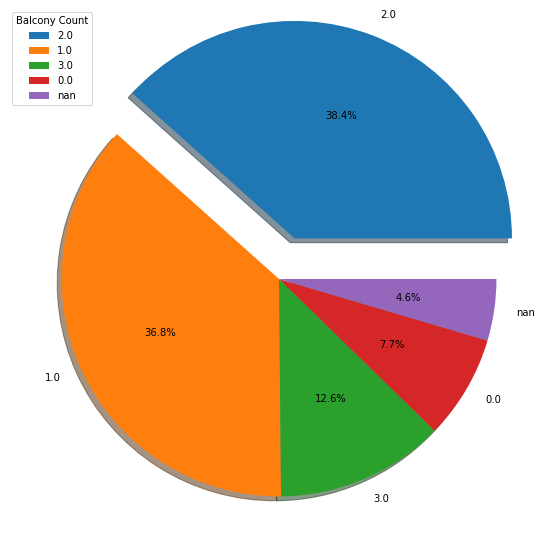

In [18]:
explode = (0.2, 0, 0, 0, 0)
plt.pie(df2['balcony'].value_counts(dropna=False), labels=df2['balcony'].value_counts(dropna=False).index, 
        explode=explode, shadow=True, autopct='%0.1f%%', normalize=True)
plt.legend(title='Balcony Count')
plt.show()

### Since 4.6% of Balcony values are NaN, either because of data entry error or data corruption, it is better to assume that it should be 0.0 rather than any other count since if it is above zero it should have fallen into other categories and wouldn't be left NaN.

In [19]:
df2['balcony'].fillna(0.0, inplace=True)

In [20]:
df2['balcony'].value_counts(dropna=False)

2.0    5113
1.0    4897
3.0    1672
0.0    1638
Name: balcony, dtype: int64

In [21]:
df2['bath'].isnull().sum()

73

In [22]:
df2['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
40.0       1
18.0       1
27.0       1
15.0       1
Name: bath, dtype: int64

In [23]:
df2['bath'].agg(['mean','median'])

mean      2.69261
median    2.00000
Name: bath, dtype: float64

### Considering the mean of 2.6 value for number of bathrooms, we can plug in median of 2 for bath, since majority of the sample already has value 2.

In [24]:
df2['bath'].fillna(2, inplace=True)

In [25]:
df2[df2['size'].isnull()]

,area_type,location,size,total_sqft,bath,balcony,price
579,Plot Area,Sarjapur Road,NaN,1200 - 2400,2.0,0.0,34.185
1775,Plot Area,IVC Road,NaN,2000 - 5634,2.0,0.0,124.000
2264,Plot Area,Banashankari,NaN,2400,2.0,0.0,460.000
2809,Plot Area,Sarjapur Road,NaN,1200 - 2400,2.0,0.0,28.785
2862,Plot Area,Devanahalli,NaN,1500 - 2400,2.0,0.0,46.800
5333,Plot Area,Devanahalli,NaN,2100 - 5405,2.0,0.0,177.115
6423,Plot Area,Whitefield,NaN,2324,2.0,0.0,26.730
6636,Plot Area,Jigani,NaN,1500,2.0,0.0,25.490
6719,Plot Area,Hoskote,NaN,800 - 2660,2.0,0.0,28.545
7680,Plot Area,Kasavanhalli,NaN,5000,2.0,0.0,400.000


### Since all the missing values of size has bath value of 2.0, and majority of the sample contains size as 2 BHK/Bedroom, it is safe to plug in value 2 BHK/Bedroom as size for the above 17 records.

In [26]:
df2[df2['bath'] == 2].groupby(['size','bath'])['bath'].agg('count')

size       bath
1 BHK      2.0       36
1 Bedroom  2.0       11
2 BHK      2.0     5039
2 Bedroom  2.0      248
3 BHK      2.0     1437
3 Bedroom  2.0      102
4 BHK      2.0       25
4 Bedroom  2.0       59
5 BHK      2.0        2
5 Bedroom  2.0        5
7 Bedroom  2.0        1
Name: bath, dtype: int64

In [27]:
df2['size'].fillna('2 BHK', inplace=True)

In [28]:
df2[df2['location'].isnull()]

,area_type,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,NaN,3 BHK,1600,3.0,2.0,86.0


In [29]:
df2['location'].value_counts()

Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Bhoganhalli             1
poornaprajna layout      1
1Hoysalanagar            1
Akash Nagar              1
Banagirinagar            1
Name: location, Length: 1305, dtype: int64

### Since only a single record doesn't have location value, it shouldn't impact much if we fill in the median value of the location i.e 'Whitefield'.

In [30]:
df2['location'].fillna('Whitefield', inplace=True)

In [31]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### All the missing values in the sample have been negotiated with reasons and are plugged in with suitable values with justified assumtions.

In [32]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [33]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [34]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [35]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


### Assuming essentially BHK & Bedroom as similar, we have negotiated the size column by creating a new column (bhk) with only the numeric values

In [36]:
df3 = df2.drop('size', axis='columns')
df3.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [37]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [38]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head(15)

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,0.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,0.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,0.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


### It appears that the total_sqft field has some non-numerical values.

In [40]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(float(tokens[0]) + float(tokens[1])/2))
    try:
        return float(x)
    except:
        return x
    
#df3['total_sqft_area'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [41]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [42]:
print(df4[~df4['total_sqft'].apply(is_float)]['total_sqft'])
print('\nNumber of rows: ' + str(len(df4[~df4['total_sqft'].apply(is_float)]['total_sqft'])))

410       34.46Sq. Meter
648            4125Perch
775        1000Sq. Meter
872        1100Sq. Yards
1019           5.31Acres
1086             30Acres
1400        716Sq. Meter
1712       1500Sq. Meter
1743     142.61Sq. Meter
1821       1574Sq. Yards
2310     361.33Sq. Yards
2881        117Sq. Yards
3228       3040Sq. Meter
3285        500Sq. Yards
4113        167Sq. Meter
4293        315Sq. Yards
5453              3Cents
5537     188.89Sq. Yards
5631        204Sq. Meter
5668         45Sq. Yards
5708      133.3Sq. Yards
5976      78.03Sq. Meter
6268        122Sq. Yards
6303      84.53Sq. Meter
6333           2.09Acres
6552            24Guntha
6592        697Sq. Meter
6953     142.61Sq. Meter
7001           1500Cents
7248        132Sq. Yards
7334              2Acres
7520       1100Sq. Meter
7607             15Acres
7726           1.26Acres
8273     151.11Sq. Yards
9423            1Grounds
9519       2940Sq. Yards
9734      45.06Sq. Meter
10488          1.25Acres
10491     86.72Sq. Meter


### Since the field name explicitly stated to be in sqft and yet we find different units of about 76 rows, its better to ignore these rows and proceed further as the sample size would be sufficient for model training and testing.

In [43]:
drop_index = df4[~df4['total_sqft'].apply(is_float)]['total_sqft'].index

df4.drop(index=drop_index, inplace=True)

In [44]:
df3.shape[0] - df4.shape[0]

46

In [45]:
df4.dtypes

area_type      object
location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [46]:
df4['total_sqft'] = df4['total_sqft'].astype('float64')
df4['bhk'] = df4['bhk'].astype('float64')

In [47]:
df4.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk           float64
dtype: object

### Datatypes of the data frame has been synchornized for the feature engineering. Basically 2 object type and 5 numeric type fields.

In [48]:
df4['price_per_sqft'] = round(df4['price']*100000/df4['total_sqft'],2)
df4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.81
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.38
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.00


### Created the new calculated column price_per_sqft

### After the data cleaning process we are left with the below dataframe.

In [49]:
df4.head(15)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.81
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.38
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.00
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.86
6,Super built-up Area,Old Airport Road,2732.0,4.0,0.0,204.00,4.0,7467.06
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,0.0,600.00,4.0,18181.82
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3.0,4828.24
9,Plot Area,Gandhi Bazar,1020.0,6.0,0.0,370.00,6.0,36274.51


In [50]:
df4['location'].str.strip().str.upper().value_counts(ascending=False)

WHITEFIELD                540
SARJAPUR  ROAD            399
ELECTRONIC CITY           304
KANAKPURA ROAD            271
THANISANDRA               236
                         ... 
BHARATHNAGAR                1
D SOUZA LAYOUT              1
KANAKAPUR MAIN ROAD         1
MADANAYAKAHALLI             1
BANASHANKARI 6TH STAGE      1
Name: location, Length: 1277, dtype: int64

### Since the total values of location has 1277, we need to concise it to better suit for encoding it for the model. So plugging in value 'Other' if the count is less than 10 for any location.

In [51]:
df4['location'] = df4['location'].str.strip().str.upper()
location_stat = df4['location'].value_counts(ascending=False)

In [52]:
location_stat_above_10 = location_stat[location_stat>10]
location_stat_below_equal_10 = location_stat[location_stat<=10]

print("Count greater than 10:")
print(location_stat_above_10)
print('\n length of location > 10: '+ str(len(location_stat_above_10)))

Count greater than 10:
WHITEFIELD          540
SARJAPUR  ROAD      399
ELECTRONIC CITY     304
KANAKPURA ROAD      271
THANISANDRA         236
                   ... 
DODDABALLAPUR        11
BANJARA LAYOUT       11
HAL 2ND STAGE        11
LB SHASTRI NAGAR     11
NARAYANAPURA         11
Name: location, Length: 240, dtype: int64

 length of location > 10: 240


In [53]:
print("Count less than equal to 10:")
print(location_stat_below_equal_10.sort_index())
print('\n')
print('\n length of location <= 10: '+ str(len(location_stat_below_equal_10)))

Count less than equal to 10:
1 ANNASANDRAPALYA                                  1
1 GIRI NAGAR                                       1
1 IMMADIHALLI                                      1
1 RAMAMURTHY NAGAR                                 1
12TH CROSS SRINIVAS NAGAR BANSHANKARI 3RD STAGE    1
                                                  ..
YELAHANKA,MVIT COLLEGE                             1
YEMLUR                                             9
YEMLUR, OLD AIRPORT ROAD,                          1
YESHWANTHPUR INDUSTRIAL SUBURB                     3
ZUZUVADI                                           1
Name: location, Length: 1037, dtype: int64



 length of location <= 10: 1037


In [54]:
df4['location'] = df4['location'].apply(lambda x: 'Other' if x in location_stat_below_equal_10 else x)
df4[df4['location'] == 'Other']

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Other,1020.0,6.0,0.0,370.00,6.0,36274.51
18,Super built-up Area,Other,2770.0,4.0,2.0,290.00,3.0,10469.31
19,Super built-up Area,Other,1100.0,2.0,2.0,48.00,2.0,4363.64
25,Super built-up Area,Other,1250.0,3.0,2.0,56.00,3.0,4480.00
42,Super built-up Area,Other,600.0,1.0,0.0,38.00,1.0,6333.33
...,...,...,...,...,...,...,...,...
13291,Plot Area,Other,812.0,1.0,0.0,26.00,1.0,3201.97
13292,Super built-up Area,Other,1440.0,2.0,2.0,63.93,3.0,4439.58
13302,Super built-up Area,Other,1075.0,2.0,2.0,48.00,2.0,4465.12
13306,Plot Area,Other,1200.0,5.0,0.0,325.00,4.0,27083.33


### Now the dataset has been cleaned and we have performed feature engineering as well, below is the dataframe.

In [55]:
df4

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,ELECTRONIC CITY PHASE II,1056.0,2.0,1.0,39.07,2.0,3699.81
1,Plot Area,CHIKKA TIRUPATHI,2600.0,5.0,3.0,120.00,4.0,4615.38
2,Built-up Area,UTTARAHALLI,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Super built-up Area,LINGADHEERANAHALLI,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Super built-up Area,KOTHANUR,1200.0,2.0,1.0,51.00,2.0,4250.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,WHITEFIELD,3453.0,4.0,0.0,231.00,5.0,6689.83
13316,Super built-up Area,Other,3600.0,5.0,0.0,400.00,4.0,11111.11
13317,Built-up Area,RAJA RAJESHWARI NAGAR,1141.0,2.0,1.0,60.00,2.0,5258.55
13318,Super built-up Area,PADMANABHANAGAR,4689.0,4.0,1.0,488.00,4.0,10407.34


In [56]:
df4.dtypes

area_type          object
location           object
total_sqft        float64
bath              float64
balcony           float64
price             float64
bhk               float64
price_per_sqft    float64
dtype: object

In [57]:
df4.to_json("C:\\Users\\stnav\\Bengaluru Housing Price Estimator Project\\Code\\cleaned_dataset")